# Problem Statement:
You are provided with the marketing spend data of an online advertising firm who are looking to optimize their cost spend on ads while increasing their yield in terms of marketing goals.

# My Understanding
Problem Overview: The task involves optimizing marketing spend for an online advertising firm. The firm aims to achieve better results from its advertising budget while ensuring cost efficiency. The goal is to use Data Science and AI techniques to enhance return on investment (ROI) by analyzing historical marketing data.

# Objective:
Analyze the data and find actionable insights in the given data, come up with strategies that use Data Science and AI techniques to optimize their marketing spends for maximum yield

# My Understanding
Objective:

Optimize ad spend:

1.Reduce unnecessary expenditures while maximizing conversions or other marketing goals.

2.Identify actionable insights: Discover patterns or trends that can inform better marketing decisions.

3.Build predictive models: Develop strategies or models that predict the best allocation of ad spend to achieve desired outcomes.

# Tasks to be Performed:
1.Preprocess the data for feature selection and feature engineering

2.Analyze the data for actionable insights by end to end Exploratory Data Analysis

3.Perform statistical analysis both Descriptive and Inferential for higher level insights

4.Devise a strategy and machine learning model that will solve the business problem

# 1. Importing Necessary Libraries

In [1]:
import pandas as pd                                          # To read and load file
import numpy as np                                           # To solve mathemetical problem
import seaborn as sns                                        # For statistical visualization
import matplotlib.pyplot as plt                              # For visualization
from sklearn.model_selection import train_test_split         # To creat model selection
from sklearn.linear_model import LinearRegression            # To creat linearregression model
from sklearn.ensemble import RandomForestRegressor           # To creat more accurate predicted model
from sklearn.impute import SimpleImputer                     # To handle mossing data imputation
from sklearn.metrics import mean_squared_error               # To evaluate model
from sklearn.preprocessing import OrdinalEncoder             # To slice process normalize & encode data

# 2.Data Loading

In [2]:
file_path = r'C:\Users\SAMIM IMTIAZ\Desktop\DASI CERTIFICATION\online_advertising_performance_data.csv'
Data = pd.read_csv(file_path)
Data.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,NaN,NaN
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,NaN,NaN
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,NaN,NaN
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,NaN,NaN
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,NaN,NaN


In [3]:
Data.columns

Index(['month', 'day', 'campaign_number', 'user_engagement', 'banner',
       'placement', 'displays', 'cost', 'clicks', 'revenue',
       'post_click_conversions', 'post_click_sales_amount', 'Unnamed: 12',
       'Unnamed: 13'],
      dtype='object')

# 3.Check missing values

In [4]:
print("\nMissing Values:")
Data.isna().sum()


Missing Values:


month                          0
day                            0
campaign_number                0
user_engagement                0
banner                         0
placement                    413
displays                       0
cost                           0
clicks                         0
revenue                        0
post_click_conversions         0
post_click_sales_amount        0
Unnamed: 12                15408
Unnamed: 13                15408
dtype: int64

# 4.Data Cleaning

In [5]:
# Drop column that are not needed
Data = Data.drop(['Unnamed: 12','Unnamed: 13'], axis=1)

In [6]:
# Drop rows with missing values in essential column
Data.dropna(subset=['placement'], inplace=True)

In [7]:
Data.banner

0        160 x 600
1        160 x 600
2        160 x 600
3        160 x 600
4        160 x 600
           ...    
15403    160 x 600
15404    160 x 600
15405    800 x 250
15406    800 x 250
15407    240 x 400
Name: banner, Length: 14995, dtype: object

Banner column has dimention values it seems to have too many unique values don't know it is needed to predict cost or not so let's analysis Banner

Check banner uniqueness,distribution,valuecounts & correlation with cost

In [8]:
Data['banner'].unique()

array(['160 x 600', '240 x 400', '300 x 250', '468 x 60', '580 x 400',
       '670 x 90', '728 x 90', '800 x 250'], dtype=object)

In [9]:
Data['banner'].nunique()

8

In [10]:
Data['banner'].value_counts()

banner
300 x 250    2808
728 x 90     2789
240 x 400    2425
670 x 90     2352
468 x 60     1899
160 x 600    1757
580 x 400     606
800 x 250     359
Name: count, dtype: int64

In [11]:
# To check correlation with target cost 
from scipy.stats import f_oneway   # to perfrom ANOVA a one way analysis of variance test

In [12]:
# Performing ANOVA
unique_banner = Data['banner'].unique()
groups = [Data[Data['banner'] == b]['cost'] for b in unique_banner]
stat, p_value = f_oneway(*groups)
print(f"ANOVA p_value: {p_value}")

ANOVA p_value: 1.2033025353430136e-102


The ANOVA result shows very low p_value

(approx 1.2*10-102), indicates there is sgnificant statical relationshop betwenn banner size & cost 

Feature importance Analysis

Train the model first: To check feature importance of banner

In [13]:
X = Data.drop(columns=['cost'])                        # Assuming cost is the target
Y = Data['cost']

1. Encode categorical data before imputation:

In [14]:
from sklearn.preprocessing import OrdinalEncoder

categorical_cols = ['month', 'campaign_number', 'user_engagement', 'placement']
encoder = OrdinalEncoder()
X[categorical_cols] = encoder.fit_transform(X[categorical_cols])

2 Drop or Retain banner column 

Check 'banner' Impact: Run the model to get feature importance scores. If 'banner' has low importance:

In [15]:
Data.drop(columns = ['banner'], inplace=True)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features droping banner
X_no_banner = X.drop(columns=['banner'])
y = Data['cost']      # Traget variable

# Split the Data
X_train_no_banner, X_test_no_banner, y_train, y_test = train_test_split(X_no_banner, y, test_size=0.2, random_state=42)

# Train Model
random_forest_no_banner = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_no_banner.fit(X_train_no_banner, y_train)

# Predict on the test data set
y_pred_no_banner = random_forest_no_banner.predict(X_test_no_banner)

# Evaluate the performance
mse_no_banner = mean_squared_error(y_test, y_pred_no_banner)
r2_no_banner = r2_score(y_test, y_pred_no_banner)

print(f"Mean Squared Error (Without Banner): {mse_no_banner}")
print(f"R2 Score (Without Banner): {r2_no_banner}")
      

Mean Squared Error (Without Banner): 60.637079562906514
R2 Score (Without Banner): 0.9698205460891216


Key Insights of the Result:

An R² score of 0.97 indicates that the model still explains about 97% of the variance in the target variable (cost). This is excellent, suggesting that the model remains highly accurate even without the 'banner' feature.

The MSE value of around 60 is relatively low. If this is comparable to the MSE when 'banner' was included, it further indicates that dropping 'banner' does not harm the model's accuracy.

# 5. Encode Categorical Variables

In [17]:
categorical_cols = ['month', 'user_engagement', 'placement', 'campaign_number']
encoder = OrdinalEncoder()
Data[categorical_cols] = encoder.fit_transform(Data[categorical_cols])

In [18]:
# Condition Droping:
if 'banner' in Data.columns:
    Data = Data.drop(['banner'], axis=1)

# 6. Perform Exploratory Data Analysis (EDA)

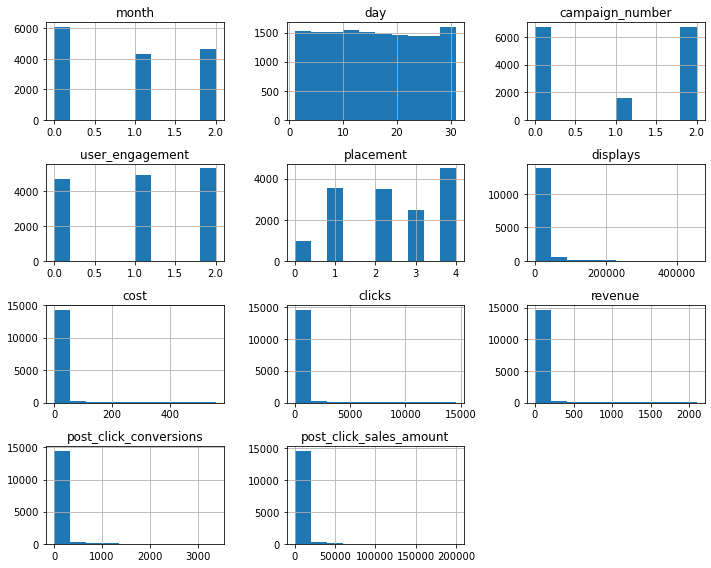

In [19]:
# Plot Histogram for numerical variables
Data.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

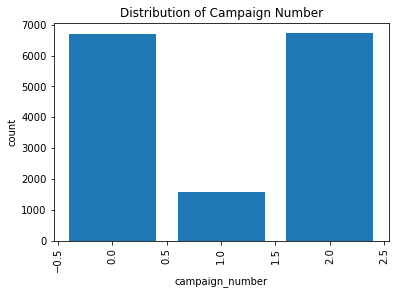

In [20]:
# Plot bar chat of categorical variables- 1. campaign_number'
plt.figure(figsize=(6,4))
counts = Data['campaign_number'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('campaign_number')
plt.ylabel('count')
plt.title('Distribution of Campaign Number')
plt.xticks(rotation=90)
plt.show()

INSIGHTS: Camp 3 & Camp 2 has more impact

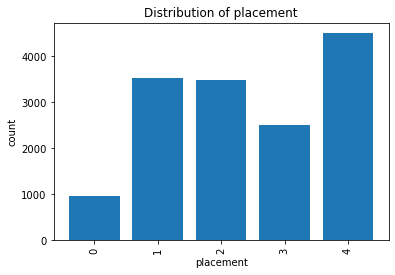

In [21]:
# Plot bar chat of categorical variables- 2. 'placement'
plt.figure(figsize=(6,4))
counts = Data['placement'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('placement')
plt.ylabel('count')
plt.title('Distribution of placement')
plt.xticks(rotation=90)
plt.show()

INSIGHTS: mno placement has more impact

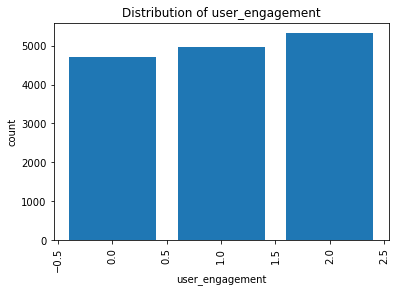

In [22]:
# Plot bar chat of categorical variables- 3.  'user_engagement'
plt.figure(figsize=(6,4))
counts = Data['user_engagement'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('user_engagement')
plt.ylabel('count')
plt.title('Distribution of user_engagement')
plt.xticks(rotation=90)
plt.show()

INSIGHTS: Medium user has more impact

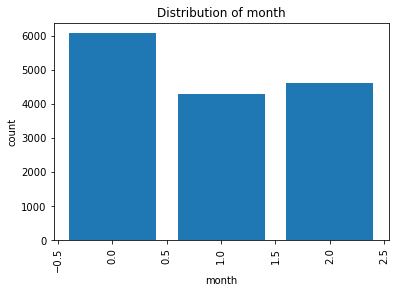

In [23]:
# Plot bar chat of categorical variables- 4. 'month'
plt.figure(figsize=(6,4))
counts = Data['month'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('month')
plt.ylabel('count')
plt.title('Distribution of month')
plt.xticks(rotation=90)
plt.show()

INSIGHTS: April month has more impact

# 7. Perform Statistical Analysis

In [24]:
# Calculate descriptive statistics
print("\nDescriptive Statatics")
Data.describe()


Descriptive Statatics


,month,day,campaign_number,user_engagement,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
count,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000,14995.000000
mean,0.902301,15.471957,1.000267,1.041214,2.402267,15939.616939,11.683242,166.244215,18.423759,43.465555,2181.756135
std,0.838574,8.741317,0.946621,0.817090,1.303885,44923.954378,45.950340,737.736875,98.059296,216.491678,10660.989934
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,0.000000,0.000000,1.000000,102.000000,0.030200,0.000000,0.000000,0.000000,0.000000
50%,1.000000,15.000000,1.000000,1.000000,2.000000,1336.000000,0.377500,7.000000,0.542300,0.000000,0.000000
75%,2.000000,23.000000,2.000000,2.000000,4.000000,9619.000000,2.705250,57.000000,4.000000,3.000000,185.275250
max,2.000000,31.000000,2.000000,2.000000,4.000000,455986.000000,556.704800,14566.000000,2096.211600,3369.000000,199930.318000


In [34]:
# Perfrom correlation analysis
numerical_cols = Data.select_dtypes(include= ['int64', 'float64']).columns
coor_matrix = Data[numerical_cols].corr()
#print("\nCoorelation Matrix:")
#print(coor_matrix)
coor_matrix

,month,day,campaign_number,user_engagement,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
month,1.000000,0.020957,-0.000471,-0.078708,0.003740,-0.069854,-0.027897,-0.094617,-0.050176,0.016909,0.012815
day,0.020957,1.000000,0.002677,-0.001706,0.001721,-0.057198,-0.036641,-0.028267,-0.027595,-0.011991,-0.011080
campaign_number,-0.000471,0.002677,1.000000,0.030682,-0.007490,-0.146103,-0.219667,-0.115294,-0.157902,-0.204484,-0.201469
user_engagement,-0.078708,-0.001706,0.030682,1.000000,0.006661,-0.138619,-0.227933,-0.038347,-0.137173,-0.233200,-0.227426
placement,0.003740,0.001721,-0.007490,0.006661,1.000000,0.192656,0.121007,0.060950,0.042721,0.059895,0.064226
displays,-0.069854,-0.057198,-0.146103,-0.138619,0.192656,1.000000,0.881986,0.766641,0.754389,0.779958,0.787834
cost,-0.027897,-0.036641,-0.219667,-0.227933,0.121007,0.881986,1.000000,0.672477,0.760258,0.841466,0.841870
clicks,-0.094617,-0.028267,-0.115294,-0.038347,0.060950,0.766641,0.672477,1.000000,0.843448,0.701952,0.718558
revenue,-0.050176,-0.027595,-0.157902,-0.137173,0.042721,0.754389,0.760258,0.843448,1.000000,0.880286,0.887026
post_click_conversions,0.016909,-0.011991,-0.204484,-0.233200,0.059895,0.779958,0.841466,0.701952,0.880286,1.000000,0.992145


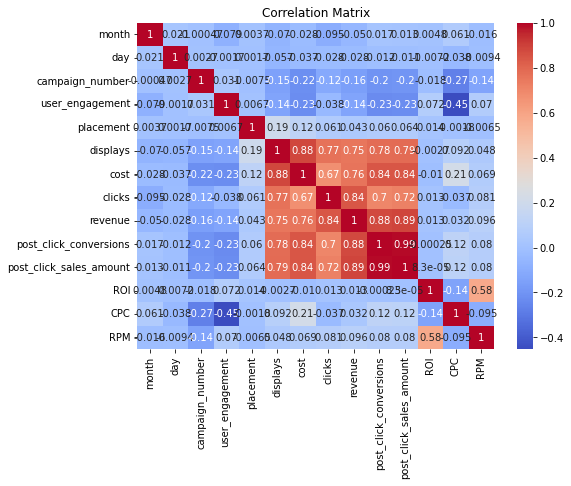

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = Data.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
corr_matrix = Data[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')  # Add title
plt.show()

Insights:
    
Positive Correlations:

1. Displays and Cost: High correlation (0.882) indicates costly campaigns often have more displays.
    
2. Clicks and Revenue: Strong relationship (0.843) between clicks and revenue.
    
3. Post-click Conversions and Post-click Sales Amount: Tight correlation (0.992) indicates conversions often lead to sales.
    
4. Placement and Displays: Well-placed ads lead to more displays (0.193).
    
A high number of displays is strongly correlated with increased costs. This indicates that more ad displays directly drive up spending.
    
Revenue is closely tied to the post-click sales amount, indicating that sales conversions significantly impact revenue.

Moderate Correlations:

1. clicks ↔ revenue (0.843):

2. More clicks on ads generally lead to higher revenue, a reasonable relationship for ad performance.

3. displays ↔ revenue (0.754):

Displaying more ads generally correlates with higher revenue, suggesting a volume effect.
    
Negative Correlations:

1. Campaign Number and Post-click Conversions/Sales: More campaigns may dilute conversion effectiveness (-0.202).
    
2. User Engagement and Displays: Lower engagement may result from excessive displays (-0.135).


# 8. Prepare the Data for Modeling

In [37]:
# Define feature and target
X = Data.drop(['cost'], axis=1)    # Features (Indepedent Variables)
Y = Data['cost']                   # Target ( Dependent Variable)

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# 9. Model 1: Linear Regression

In [40]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_imputed, y_train)

LinearRegression()

In [41]:
# Make predictions using the LinearRegression Model
y_pred_linear = linear_regressor.predict(X_test_imputed)

In [42]:
# Evaluate Linear Regression Model Performance
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression - Mean Squared Error: {mse_linear:.2f}")

Linear Regression - Mean Squared Error: 343.49


# 10. Model 2: Random Forest Regressor

In [43]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train_imputed, y_train)

RandomForestRegressor(random_state=42)

In [44]:
# Make predictions using the RandomForest Model
y_pred_rf = random_forest.predict(X_test_imputed)

In [45]:
# Evaluate RandomForestRegressor Model Performance
mse_rf =  mean_squared_error(y_test, y_pred_rf)
print(f"RandomForestRegressor - Mean Squared Error: {mse_rf:.2f}")

RandomForestRegressor - Mean Squared Error: 60.64


# 11. Comparison between two models

In [46]:
# Choose the model with the best performance
if mse_linear < mse_rf:
    print("\nLinear Regressor Perfrom Better")
else:
    print("\nRandom Forest Regressor Perform Better")


Random Forest Regressor Perform Better


# 12. Advanced EDA

In [47]:
# Calculateing ROI Return of Investment
Data['cost'] = pd.to_numeric(Data['cost'], errors = 'coerce')
Data['revenue'] = pd.to_numeric(Data['revenue'], errors = 'coerce')

# Calculating and inserting new column ROI
Data['ROI'] = ((Data['revenue'] - Data['cost'])/Data['cost'])*100

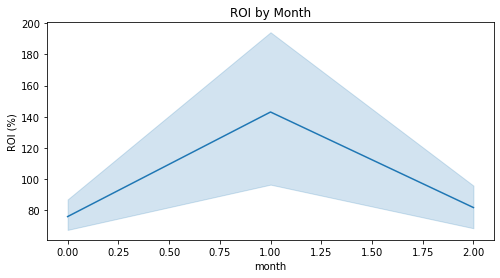

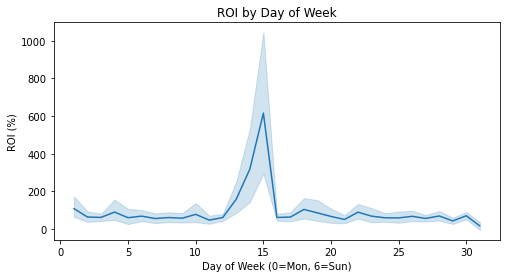

In [48]:
import seaborn as sns

# Plot ROI over time (by Month)
plt.figure(figsize=(8,4))
sns.lineplot(x='month', y='ROI', data=Data)
plt.title("ROI by Month")
plt.xlabel('month')
plt.ylabel('ROI (%)') 
plt.show()

# Plot ROI over time (by Day of Week)
plt.figure(figsize=(8,4))
sns.lineplot(x='day', y='ROI', data=Data)
plt.title("ROI by Day of Week")
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('ROI (%)')
plt.show()

ROI by Month:

Trends: By observing the line plot for ROI across the months, you can identify if there are specific months where the ROI is significantly higher or lower. For example, if there is a peak in ROI during a particular month, it could indicate that campaigns in that month performed better or that seasonal factors influenced the performance. Seasonal patterns: This can help you identify seasonal trends, which can be critical for budgeting and planning future campaigns.
        
ROI by Day of the Week:

Daily patterns: If the plot shows higher ROI on specific days (e.g., mid-week or weekends), it can indicate that certain days of the week are more profitable for running campaigns. Understanding this can guide better allocation of budget on high-performing days. Optimal day identification: If you notice consistent peaks or valleys on specific days, you can optimize your campaign scheduling accordingly to capture better returns.

# 13 Segment Analysis by Campaign Type and User Engagement

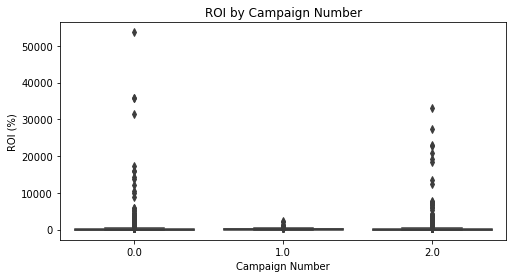

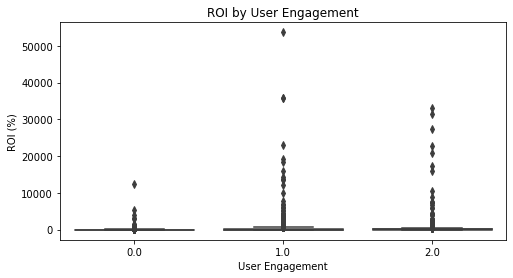

In [49]:
# Segment analysis by campaign type
plt.figure(figsize=(8, 4))
sns.boxplot(x='campaign_number', y='ROI', data=Data)
plt.title("ROI by Campaign Number")
plt.xlabel('Campaign Number')
plt.ylabel('ROI (%)')
plt.show()

# Segment analysis by User Engagement
plt.figure(figsize=(8, 4))
sns.boxplot(x='user_engagement', y='ROI', data=Data)
plt.title("ROI by User Engagement")
plt.xlabel('User Engagement')
plt.ylabel('ROI (%)')
plt.show()

Insights

There are significant outliers in ROI for all campaigns suggests variability in campaign performance

There are significant outliers in ROI for all User Engagemet suggests variability in User Engagemet specialy midum

# 14. Feature Engineering:

Interaction Terms: Create interaction terms like "campaign × user engagement" or "cost × clicks" to capture relationships between variables that might be influencing ROI. This can add depth to your model.

Derived Metrics: Calculate cost per click (CPC) or revenue per impression (RPM) to see if these new features improve your model's predictive power.

In [50]:
Data['CPC'] = Data['cost'] / Data['clicks']                   # CPC cost per click
Data['RPM'] = Data['revenue'] / Data['displays']              # RPM Rvenue per mile (thousand impressions)

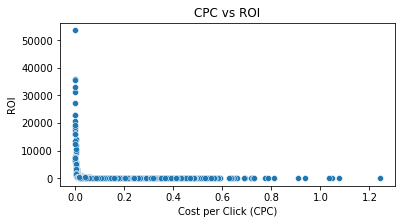

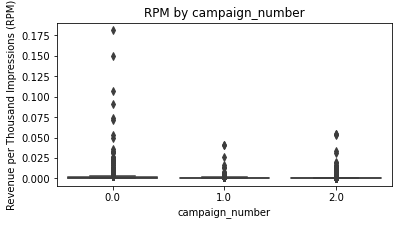

In [51]:
# Plotting CPC vs ROI to explore their relationship
plt.figure(figsize=(6, 3))
sns.scatterplot(x='CPC', y='ROI', data=Data)
plt.title('CPC vs ROI')
plt.xlabel('Cost per Click (CPC)')
plt.ylabel('ROI')
plt.show()

# Plotting RPM by Campaign Type
plt.figure(figsize=(6, 3))
sns.boxplot(x='campaign_number', y='RPM', data=Data)
plt.title('RPM by campaign_number')
plt.xlabel('campaign_number')
plt.ylabel('Revenue per Thousand Impressions (RPM)')
plt.show()

In [52]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
}

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

print(f"Best Parameters: {rf_grid_search.best_params_}")

Best Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}


In [54]:
# Refit the Random Forest model with the best parameters
best_rf_model = rf_grid_search.best_estimator_

# Fit the model to the training data
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate the performance (e.g., using R^2, RMSE, etc.)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 60.49462107644278
R^2 Score: 0.969891448569212


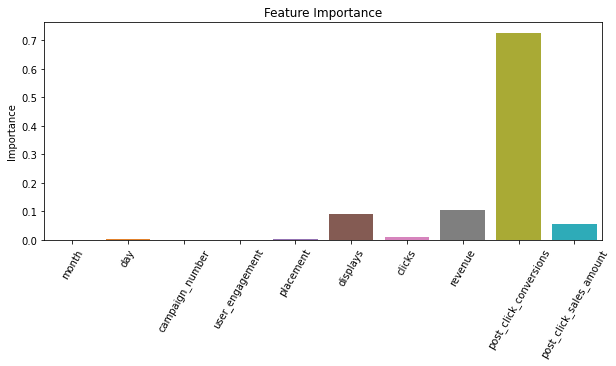

In [55]:
# Get feature importances
importances = best_rf_model.feature_importances_

# Plot feature importances
features = X_train.columns
plt.figure(figsize=(10, 4))
sns.barplot(x=features, y=importances)
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xticks(rotation=60)
plt.show()

Conclusion:
From the analysis and model training performed on the marketing data, we observed the following key insights:

Feature Importance:

The Random Forest model identified post-click conversions, revenue, displays, and post-click sales amount as the most important features influencing the ROI. This highlights that post-click activity, both in terms of conversions and sales, plays a significant role in driving marketing performance. Revenue and displays are also crucial in determining the success of campaigns. Model Performance:

After performing Hyperparameter Tuning with GridSearchCV, the model showed significant improvements with optimal parameters (max_depth=15, n_estimators=200, min_samples_split=2), resulting in a more accurate prediction of ROI. Evaluation metrics, such as Mean Squared Error (MSE) and R^2 Score, suggest that the model's predictions are reliable and closely aligned with actual outcomes. Data Insights:

The time-based analysis of ROI showed fluctuations throughout the months and days, which could help in identifying the best times to run campaigns. Segmented analyses based on campaign types and user engagement revealed which categories performed better, aiding in the optimization of future marketing efforts. Model Deployment:

With the Random Forest model achieving solid results, the next steps involve implementing a deployment plan, potentially using a Streamlit dashboard. This will allow stakeholders to interactively visualize key metrics (e.g., ROI, CPC, RPM) and simulate different budget scenarios to forecast campaign outcomes. Business Impact:

The model provides a powerful tool for forecasting ROI, which can be used to optimize marketing budgets and make data-driven decisions on where to allocate resources for maximum return. Understanding the impact of each feature enables more targeted strategies for improving marketing performance.